# Analisis de general de las variables del dataset
---

---
### Indice de temas

* [Genero](#Genero)
* [Variables Categoricas](#Variables-Categoricas)
    * [Nivel de estudios](#Nivel-de-estudios)
* [Variables Numericas](#Variables-numericas)
    * [Sueldo](#Sueldo)
* [Tablas de contingencia](#Tablas-de-contingencia)
* [Heat Maps](#Heat-Maps)
* [Hue (matiz)](#Hue-(en-castellano,-matiz))
* [Seaborn Pairplot](#Seaborn-Pairplot)
* [Seaborn Jointplot](#Seaborn-Jointplot)
* [Seaborn Pairplot 2](#Seaborn-Pairplot-(only-one-plot))
* [Seaborn Catplot](#Seaborn-catplot)
---


In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn as sns

Lectura del dataset desde archivo en computadora personal
En caso de no poder utilizar la estrategia anterior para obtener el dataframe se puede usar esta estrategia. Primero descargar el archivo csv en a computadora personal y luego ejecutar las celdas siguientes.

El url del .csv que contiene los resultados de la encuesta es: url = https://sysar.my/sueldos20221arg

In [2]:
from google.colab import files
uploaded = files.upload()

Saving renamed_2022.1 - sysarmy - Encuesta de remuneración salarial Argentina - Argentina.csv to renamed_2022.1 - sysarmy - Encuesta de remuneración salarial Argentina - Argentina.csv


In [3]:
df = pd.read_csv('renamed_2022.1 - sysarmy - Encuesta de remuneración salarial Argentina - Argentina.csv')
df.head(3)

,work_province,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,...,work_listen_more_men,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,work_lastyear_discrimination,¿Salir o seguir contestando?.3,company_days_in_the_office,company_pandemic_support,company_new_benefits,profile_age,profile_gender
0,Catamarca,Tercerizado (trabajo a través de consultora o ...,207000,150000.0,NaN,NaN,2,1,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,Varón Cis
1,Catamarca,Full-Time,130000,99000.0,NaN,NaN,3,4,Un sueldo,Performance de la compañía,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,Varón Cis
2,Catamarca,Full-Time,185000,145000.0,Mi sueldo está dolarizado (pero cobro en moned...,100,2,2,De uno a tres sueldos,Performance grupal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,Varón Trans


In [4]:
# vamos a crear una nueva columna que tenga los datos de salary_monthly_BRUTO en float y 
# que no tenga nada si no puede convertirlo

df['salary_monthly_BRUTO'] = pd.to_numeric(df['salary_monthly_BRUTO'],
                                           errors='coerce')


# errors: {‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
# If ‘raise’, then invalid parsing will raise an exception.
# If ‘coerce’, then invalid parsing will be set as NaN.
# If ‘ignore’, then invalid parsing will return the input.

In [5]:
# despues del boque anterior tienen que haber quedado algunas celdas con NaN
df.salary_monthly_BRUTO.isna().sum()

100

In [6]:
# vamos a eliminar las entradas que tienen Nan en la columna salary_monthly_BRUTO
df = df.dropna(subset=['salary_monthly_BRUTO'])
df.shape

(5754, 56)

In [7]:
df['profile_gender'].unique()

array(['Varón Cis', 'Varón Trans', 'Mujer Cis', 'Varón ', 'Mujer Trans',
       'Prefiero no decir', 'Masculino', 'Hombre', 'Fluido',
       'No estoy interiorizado en el tema como para poder decir que me identifico con algún genero.',
       'No binarie', 'Agénero',
       'Masculino. No esos inventos de la actualidad. ', 'Mujer', 'Varon',
       'Hombre ', 'MASCULINO.', 'Varón', 'Varon (no se que es Cis)',
       'comemelaverga', 'Pueden exlicar qué significa cada término?', '.',
       'flaco era de remuneración salarial o de género esta encuesta?',
       'Normal, no se que significa todo eso', 'Varón conservador ',
       'HOMBRE', 'que es cis?', 'hombre',
       'Hombre, no me siento identificado con el resto',
       'Qué complicado todo...',
       'géneros hay sólo 2, el resto son filias',
       'Mujer de nacimiento, tengo vulva', 'Ave', 'Mujer lesbiana',
       'No entiendo la pregunta... Masculino... Déjense de romper los huevos con pelotudeces modernas.',
       'Masculino

Vemos que en la encuesta del 2021 la diversidad de respuestas a la pregunta de genero es super variada. A los fines del ejercicio propuesto para este notebook no nos sirve.
Por lo tanto vamos a utilizar la encuesta del 2020.

---

### Volvemos a cargar el dataset...

In [8]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

## Genero

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


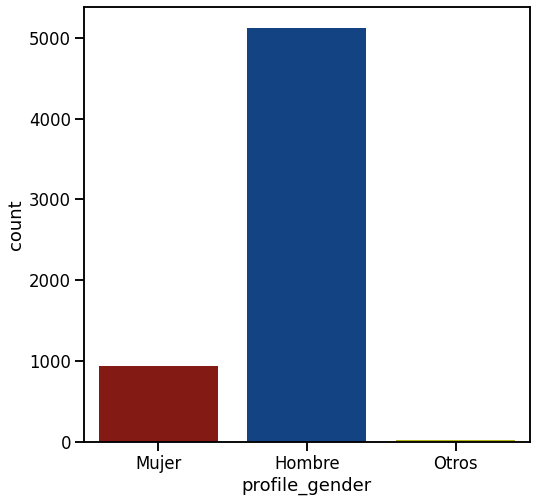

0        Mujer
1       Hombre
2        Mujer
3       Hombre
4       Hombre
         ...  
6090    Hombre
6091    Hombre
6092    Hombre
6093    Hombre
6094    Hombre
Name: profile_gender, Length: 6095, dtype: object
<class 'pandas.core.series.Series'>
Hombre    5122
Mujer      942
Otros       31
Name: profile_gender, dtype: int64


In [9]:
fig = plt.figure(figsize=(8,8))
sns.set_context('talk')

color_palette = {'Mujer':'#960a00', 'Hombre':'#004196', 'Otros': '#cbcf00'}
sns.countplot(df.profile_gender,
              palette = color_palette)

plt.show()
# a veces tb es importante visualizar no solo los datos graficamente sino tambine ver como estan ingresados en el dataset
print(df.profile_gender) 
print(type(df.profile_gender))
print(df.profile_gender.value_counts())

plt.show()

Vemos que la encuesta fue respondida por 5122 Hombres, 942 Mujeres y 31 personas que no se identifican con ninguno de esos dos generos.

---

# Variables categoricas
## Nivel de estudios
Analizamos el maximo nivel de estudios alcanzado por las personas que respondieron la encuesta. 

In [10]:
df['profile_studies_level'].value_counts()

Universitario    4133
Terciario        1135
Secundario        449
Posgrado          342
Doctorado          30
Posdoctorado        4
Primario            2
Name: profile_studies_level, dtype: int64

Vamos a realizar un countplot ordenado y desordenado

In [11]:
sorted_studies_levels = ['Primario', 'Secundario', 'Terciario', 'Universitario', 'Posgrado', 'Doctorado', 'Posdoctorado']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


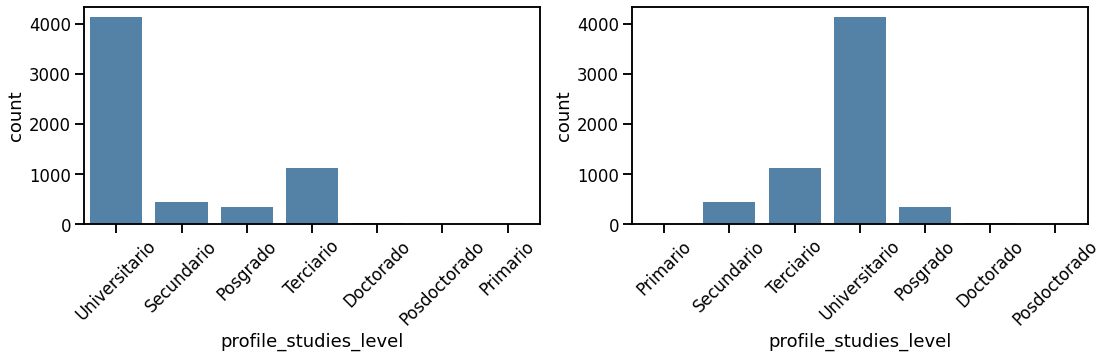

In [12]:
fig, axes = plt.subplots(nrows = 1,
                         ncols = 2,
                         figsize = (18,4))

sns.countplot(df.profile_studies_level, 
              ax=axes[0],
              color = 'steelblue')

sns.countplot(df.profile_studies_level, 
              ax=axes[1],
              color = 'steelblue',
              order = sorted_studies_levels)

for ax in axes:
  ax.tick_params(axis = 'x', rotation = 45)
  
plt.show()

# Variables Numericas
## Sueldo mensual

In [13]:
# definimos una variable que se llame salary_col para facilitar la escritura del codigo mas adelante
salary_col = 'salary_monthly_BRUTO'

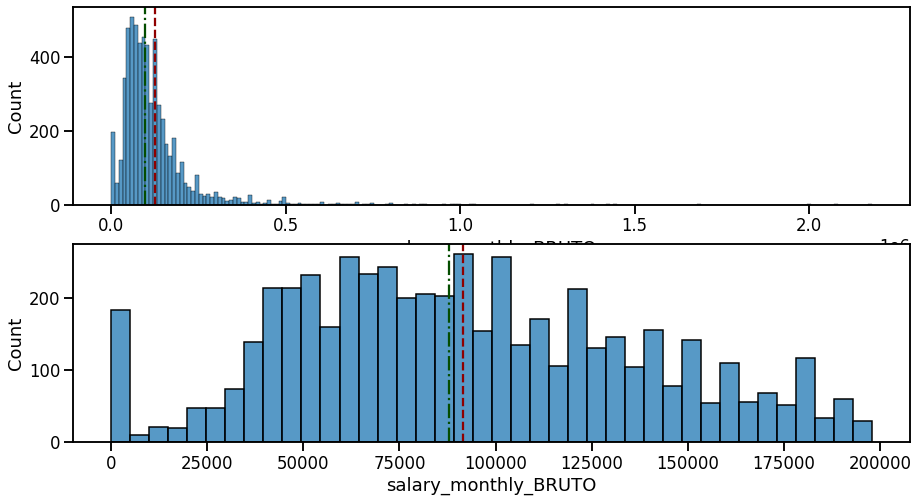

For the entire DataSet:
 mean = 124058.55
 median = 96000.0
For the filtered DataSet:
 mean = 91461.11
 median = 88000.0


In [14]:
fig, axes = plt.subplots(nrows  = 2,
                        ncols = 1,
                        figsize = (15,8))

sns.histplot(ax = axes[0],
             data = df[salary_col],
             bins = 200)


filtered_df = df[df[salary_col]<200000] #generamos una nueva df que solo tiene las filas donde df[salary_col]<2000000 
sns.histplot(ax = axes[1],
             data = filtered_df[salary_col],
             bins = 40)
# agregamos lines verticales marcando los valores de la media y la mediana

axes[0].axvline(df[salary_col].mean(),
                color = '#8f0000',
                linestyle = '--',
                label = 'Mean')
axes[0].axvline(df[salary_col].median(),
                color = '#044d00',
                linestyle = '-.',
                label = 'Median')

axes[1].axvline(filtered_df[salary_col].mean(),
                color = '#8f0000',
                linestyle = '--',
                label = 'Mean')
axes[1].axvline(filtered_df[salary_col].median(),
                color = '#044d00',
                linestyle = '-.',
                label = 'Median')


plt.show()
print(f'For the entire DataSet:\n mean = {round(df[salary_col].mean(),2)}\n median = {round(df[salary_col].median(),2)}')
print(f'For the filtered DataSet:\n mean = {round(filtered_df[salary_col].mean(),2)}\n median = {round(filtered_df[salary_col].median(),2)}')


# Variables categoricas

## Tablas de contingencia
Son un excelente instrumento para analizar relaciones entre dos variables categoricas de nuestro dataset

In [15]:
pd.crosstab(df['profile_gender'], df['profile_studies_level']) # Tabla de contingencia NO ordenada

profile_studies_level,Doctorado,Posdoctorado,Posgrado,Primario,Secundario,Terciario,Universitario
profile_gender,,,,,,,
Hombre,19,4,256,2,424,970,3447
Mujer,8,0,85,0,24,158,667
Otros,3,0,1,0,1,7,19


In [16]:
pd.crosstab(df['profile_gender'], df['profile_studies_level'])[sorted_studies_levels] # tabla de contingencia ordenada

profile_studies_level,Primario,Secundario,Terciario,Universitario,Posgrado,Doctorado,Posdoctorado
profile_gender,,,,,,,
Hombre,2,424,970,3447,256,19,4
Mujer,0,24,158,667,85,8,0
Otros,0,1,7,19,1,3,0


In [17]:
# una forma muy util de ver los datos es normalizar (contra el total de valores) y multiplicar por 100 para obtener el porcentaje.
pd.crosstab(df['profile_gender'], df['profile_studies_level'], normalize=True).round(4)[sorted_studies_levels]*100

profile_studies_level,Primario,Secundario,Terciario,Universitario,Posgrado,Doctorado,Posdoctorado
profile_gender,,,,,,,
Hombre,0.03,6.96,15.91,56.55,4.20,0.31,0.07
Mujer,0.00,0.39,2.59,10.94,1.39,0.13,0.00
Otros,0.00,0.02,0.11,0.31,0.02,0.05,0.00


In [18]:
# de forma similar podemos normalizar contra los datos de la misma fila usando normalize='index'
pd.crosstab(df['profile_gender'], df['profile_studies_level'], normalize='index').round(4)[sorted_studies_levels]*100

profile_studies_level,Primario,Secundario,Terciario,Universitario,Posgrado,Doctorado,Posdoctorado
profile_gender,,,,,,,
Hombre,0.04,8.28,18.94,67.30,5.00,0.37,0.08
Mujer,0.00,2.55,16.77,70.81,9.02,0.85,0.00
Otros,0.00,3.23,22.58,61.29,3.23,9.68,0.00


## Heat Maps

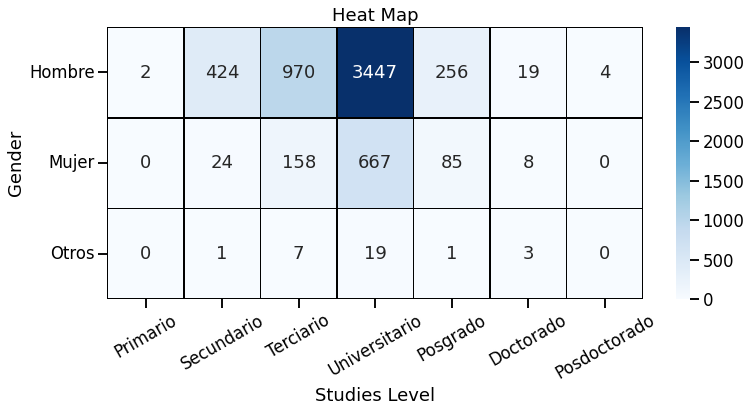

In [19]:
# graficamos los valores crudos.
fig = plt.figure(figsize=(12,5))

data = pd.crosstab(df['profile_gender'], df['profile_studies_level'])[sorted_studies_levels]
sns.heatmap(data,
            annot = True,
            fmt = 'g',
            cmap='Blues',
            linewidth=0.5,
            linecolor = 'black')

plt.xticks(rotation=30)
plt.xlabel('Studies Level')
plt.yticks(rotation=0)
plt.ylabel('Gender')

plt.title('Heat Map')




plt.show()



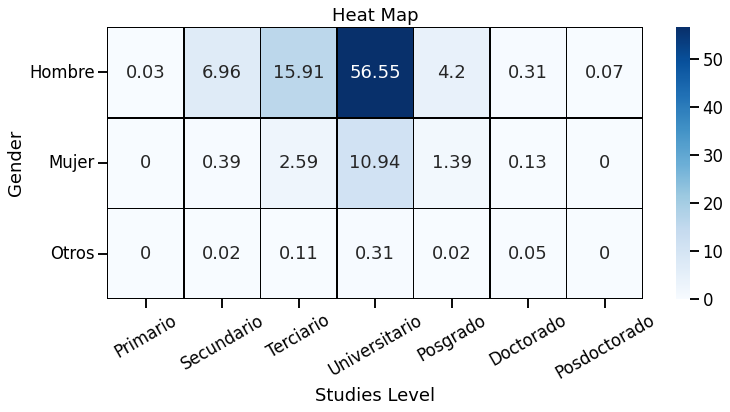

In [20]:
# graficamos los valores normalizados frente al total.
fig = plt.figure(figsize=(12,5))

data = pd.crosstab(df['profile_gender'], df['profile_studies_level'], normalize=True).round(4)[sorted_studies_levels]*100
sns.heatmap(data,
            annot = True,
            fmt = 'g',
            cmap='Blues',
            linewidth=0.5,
            linecolor = 'black')

plt.xticks(rotation=30)
plt.xlabel('Studies Level')
plt.yticks(rotation=0)
plt.ylabel('Gender')

plt.title('Heat Map')




plt.show()

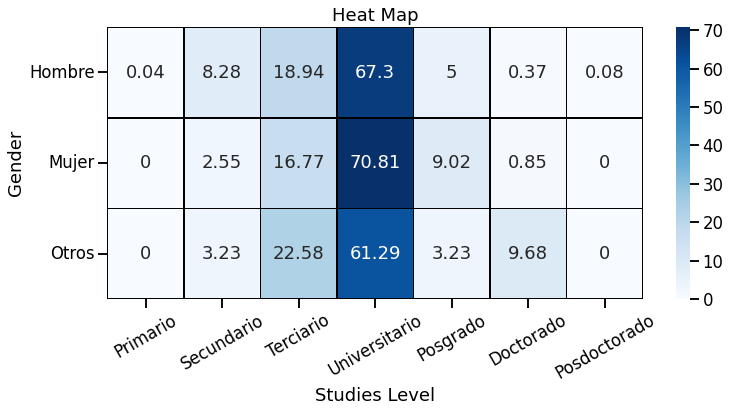

In [21]:
# graficamos los valores normalizados para cada genero.
fig = plt.figure(figsize=(12,5))

data = pd.crosstab(df['profile_gender'], df['profile_studies_level'], normalize='index').round(4)[sorted_studies_levels]*100
sns.heatmap(data,
            annot = True,
            fmt = 'g',
            cmap='Blues',
            linewidth=0.5,
            linecolor = 'black')

plt.xticks(rotation=30)
plt.xlabel('Studies Level')
plt.yticks(rotation=0)
plt.ylabel('Gender')

plt.title('Heat Map')




plt.show()

## Hue (en castellano, matiz)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


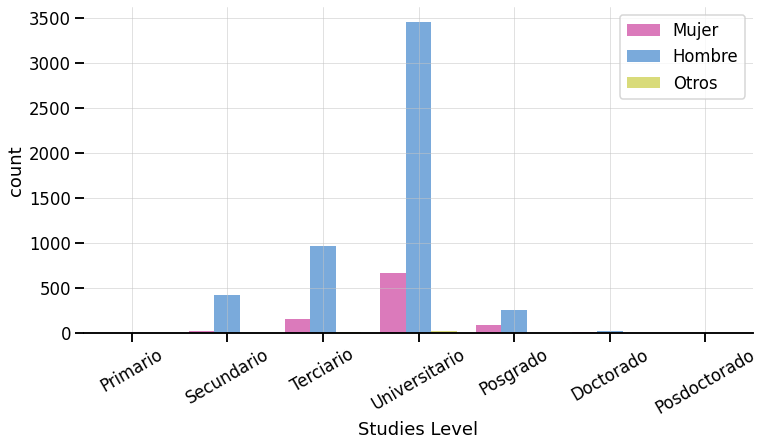

In [22]:
fig = plt.figure(figsize=(12,6))

sns.countplot(df['profile_studies_level'],
              hue = df.profile_gender,
              order = sorted_studies_levels,
              palette=["#eb6ac0", "#6aaaeb", "#e8eb6a"])

plt.xticks(rotation=30)
sns.despine()
plt.legend(loc=1)
plt.xlabel('Studies Level')

# incorporamos una grilla al grafico
plt.grid(color = '#c4c4c4',
         linewidth = 0.5)


# eliminamos las lineas superior y de los costados que delimitan el grafico
sns.despine(top=True, right=True, left=True)

# a los ticks del eje y les ponemos el mismo color que a la grilla
plt.tick_params(color='black')

plt.show()

## Variables numericas 

In [46]:
df.profile_age.describe().round(2)
# vemos que hay datos que fueron mal introducidos en la columna 'profile_age'. Hay un dato que es 52000.
# vamos a tomar la decision de eliminar todos los datos de personas que sean mayores a 65 anios.

count     6095.00
mean        41.18
std        665.72
min         18.00
25%         27.00
50%         31.00
75%         37.00
max      52000.00
Name: profile_age, dtype: float64

In [ ]:

max_age = 65

In [47]:
df[df.profile_age<max_age]['profile_age'].describe().round(2)

count    6091.00
mean       32.56
std         7.22
min        18.00
25%        27.00
50%        31.00
75%        37.00
max        64.00
Name: profile_age, dtype: float64

## Seaborn Pairplot

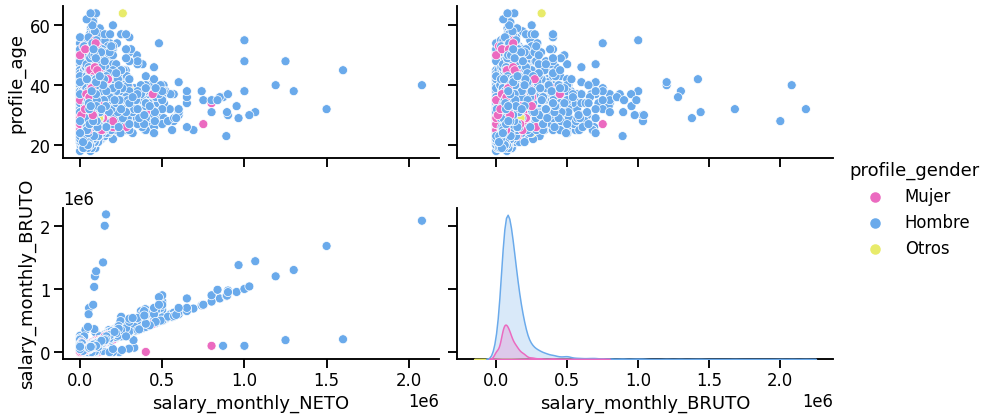

In [48]:
sns.pairplot(data=df[df.profile_age<max_age],
             y_vars=['profile_age', 'salary_monthly_BRUTO'],
             x_vars=['salary_monthly_NETO', 'salary_monthly_BRUTO'],
             aspect=2,
             height=3,
             diag_kind="kde",
             hue='profile_gender',
             palette= {'Mujer':'#eb6ac0', 'Hombre':'#6aaaeb', 'Otros':'#e8eb6a'})



plt.show()

## Seborn Jointplot

<Figure size 432x288 with 0 Axes>

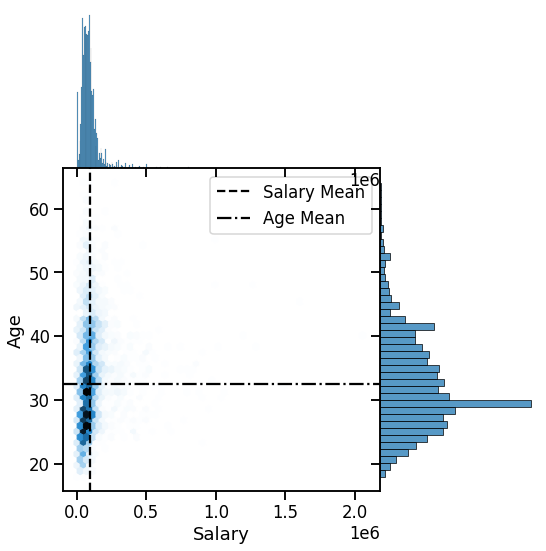

In [73]:
fig = plt.figure()

sns.jointplot(data=df[df.profile_age < max_age],
              x = 'salary_monthly_NETO',
              y = 'profile_age',
              kind = 'hex',
              height = 8,
              ratio = 2,
              space = 0) 
plt.xlabel('Salary')
plt.ylabel('Age')

plt.axvline(x = df[df.profile_age<max_age]['salary_monthly_NETO'].mean(),
            color = 'black',
            linestyle = 'dashed',
            label = 'Salary Mean')

plt.axhline(y = df[df.profile_age<max_age]['profile_age'].mean(),
            color = 'black',
            linestyle = 'dashdot',
            label = 'Age Mean')

plt.legend()

# remove scientific notation
plt.ticklabel_format(style='plain', axis = 'y')

plt.show()

## Seaborn Pairplot (only one plot)

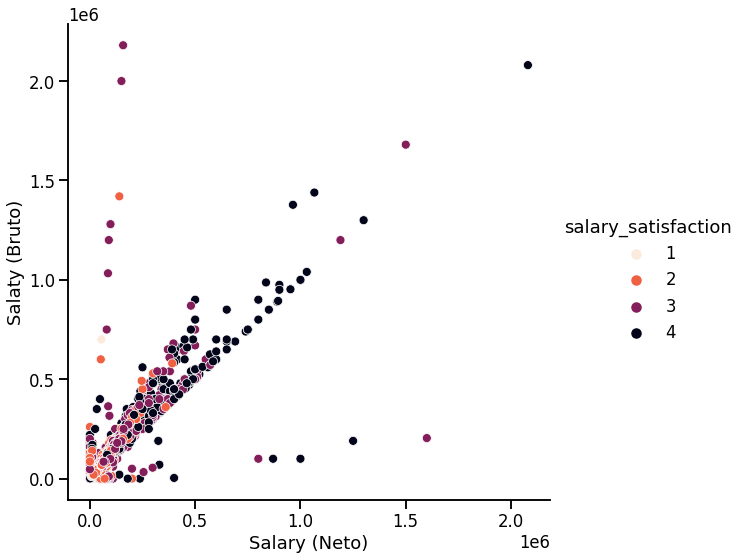

In [99]:
sns.pairplot(data = df[df.profile_age<max_age],
             x_vars=['salary_monthly_NETO'],
             y_vars=['salary_monthly_BRUTO'],
             height = 8,
             aspect = 1,
             hue = 'salary_satisfaction',
             palette = 'rocket_r')
plt.xlabel('Salary (Neto)')
plt.ylabel('Salaty (Bruto)')
plt.show()

## Variables Mixtas (Numericas y Categoricas)

### Seaborn Catplot

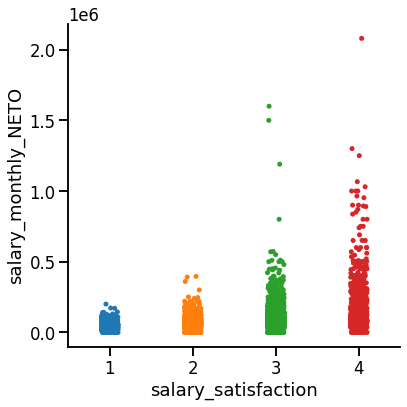

In [94]:
sns.catplot(data = df[df.profile_age<max_age],
            x = 'salary_satisfaction',
            y = 'salary_monthly_NETO',
            height = 6,
            aspect = 1,
            kind = 'strip'
            )

plt.show()

In [87]:
help(sns.catplot)

Help on function catplot in module seaborn.categorical:

catplot(*, x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x7f5123e244d0>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)
    Figure-level interface for drawing categorical plots onto a FacetGrid.
    
    This function provides access to several axes-level functions that
    show the relationship between a numerical and one or more categorical
    variables using one of several visual representations. The ``kind``
    parameter selects the underlying axes-level function to use:
    
    Categorical scatterplots:
    
    - :func:`stripplot` (with ``kind="strip"``; the default)
    - :func:`swarmplot` (with ``kind="swarm"``)
    
    Categorical dist

In [ ]:
aborn.catplot(data=df[df.profile_age < max_age], y='salary_monthly_NETO',  #probar también con profile_age, 'profile_gender'
                x='salary_satisfaction', height=4, aspect=2)